# ******************PROJECT*****************
   
   # INVESTIGATE THE DATASET(IMDM MOVIE)

    TABLE OF CONTENTS:
        -Introduction
        -Data Wrangling
        -Exploratory Data Analysis
        -Conclusions
        
        
Intoduction:
    
     We start doing project using IMDB movie datasets.It contains 10000 records and number of columns is 21.The given 
     dataset could be analysed and it cound help
     to reach some important information about those given data.Following are the points which could be analysed using
     the visualization of the datasets.
    
     1)we can find the most profitable movie
     2)we can find the average runtime of those movies over years
     3)we can find the genre which is mostly watched
     4)we can also find the highest and lowest budget movies
     5) we can find the max an min revenue
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading datasets and storing it in movie named variable
movie=pd.read_csv(r'C:\Users\Rohan\Desktop\nano_data_science\imdb_movies.csv')

#just seeing the sample of the movie dataframe
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# DATA WRANGLING:
    The Data wrangling is being performed below by keeping the observed above point  in mind.so the required columns are being filtered for the further analysis.

In [3]:
#checking whether there is null values
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#just looking over the columns and its types
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Filtering columns

In [5]:
#filtering of columns which is needed or useful for analysis of the data of the movie dataframe
filter_column=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#storing the filtered column in imdb_movies using drop()
imdb_movies=movie.drop(filter_column,axis=1)
imdb_movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [6]:
#displaying the names of selected columns
imdb_movies.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'tagline',
       'runtime', 'genres', 'release_date', 'release_year'],
      dtype='object')

In [7]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


# Deleting the Duplicates

In [8]:
#It delete the rows only when any column has null values except first appearance

imdb_movies.drop_duplicates(keep='first',inplace = True)
imdb_movies.head(10)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,12/25/15,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,9/30/15,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,6/17/15,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,6/9/15,2015


In [9]:
#checking the null values

imdb_movies.isna().sum()

budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

# Filling the NaN values with zero

In [10]:
#filling the null cell with 0
imdb_movies=imdb_movies.fillna(0)

In [11]:
imdb_movies.isna().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [12]:
imdb_movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [13]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10865 non-null  int64 
 1   revenue         10865 non-null  int64 
 2   original_title  10865 non-null  object
 3   cast            10865 non-null  object
 4   director        10865 non-null  object
 5   tagline         10865 non-null  object
 6   runtime         10865 non-null  int64 
 7   genres          10865 non-null  object
 8   release_date    10865 non-null  object
 9   release_year    10865 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 933.7+ KB


# Changing datatype of columns

In [14]:
#changing the DataTypes of relese_date from string to datetime type
imdb_movies['release_date']=pd.to_datetime(imdb_movies.release_date)
imdb_movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [15]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10865 non-null  int64         
 1   revenue         10865 non-null  int64         
 2   original_title  10865 non-null  object        
 3   cast            10865 non-null  object        
 4   director        10865 non-null  object        
 5   tagline         10865 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10865 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 933.7+ KB


# Exploratorary Data Analysis

In [16]:
#Profit earned =income - expenditure (basic concept)
#and inserting the profit collumns at index[2]
imdb_movies.insert(2,'Profit_outcome',imdb_movies['revenue']-imdb_movies['budget'])
imdb_movies.head()

,budget,revenue,Profit_outcome,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


# Defining the function

In [17]:
#defining the function

def Calculate_with_function(column):
    # maximum profit
    max_profit= imdb_movies[column].idxmax()
    max_profit=pd.DataFrame(imdb_movies.loc[max_profit])
    
    # Min profit
    min_profit= imdb_movies[column].idxmin()
    min_profit=pd.DataFrame(imdb_movies.loc[min_profit])
    
    #concatenating max_profit and min_profit
    info=pd.concat([max_profit, min_profit], axis=1)
    
    return info

#calling the function
Calculate_with_function('Profit_outcome')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
Profit_outcome,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


# Function call for Revenue

In [18]:
#function call
#using the above function to calculate maximum revenue and minimum revenue
Calculate_with_function('revenue')

,1386,48
budget,237000000,30000000
revenue,2781505847,0
Profit_outcome,2544505847,-30000000
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
release_date,2009-12-10 00:00:00,2015-01-14 00:00:00


# Function call for Budget

In [19]:
#function call
#using the above function to calculate maximum budget and minimum budget
Calculate_with_function('budget')

,2244,30
budget,425000000,0
revenue,11087569,29355203
Profit_outcome,-413912431,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


# Finding Average Running_Time

In [20]:
#Defing the function to calculate the average movies runtime
def avg_runtime(time):
    return imdb_movies[time].mean()


#calling rhe above defined function
print(f"Average Movies Running Time {avg_runtime('runtime')}")

Average Movies Running Time 102.07179015186378


# plotting a graph of movies and its running time

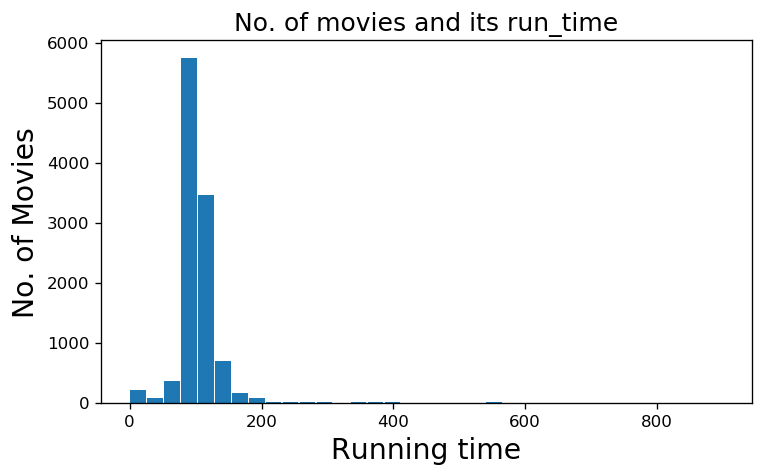

In [21]:
#Plotting a graph between the number of movies and its run time

#plotting a figure(outline) and its size
plt.figure(figsize=(7,4), dpi = 120)

#Labelling the title
plt.title('No. of movies and its run_time', fontsize=15)

#labelling the x_axis
plt.xlabel('Running time', fontsize = 17)

#Labelling the y_axis
plt.ylabel('No. of Movies', fontsize=17)

#plotting the  graph using runtime values 
plt.hist(imdb_movies['runtime'],rwidth = 0.91, bins =35)

#just displaying the plotted graph
plt.show()


In [22]:
#grouping the movies by their released date
profits_over_year = imdb_movies.groupby('release_year')['Profit_outcome'].sum()

# Plotting a line graph 

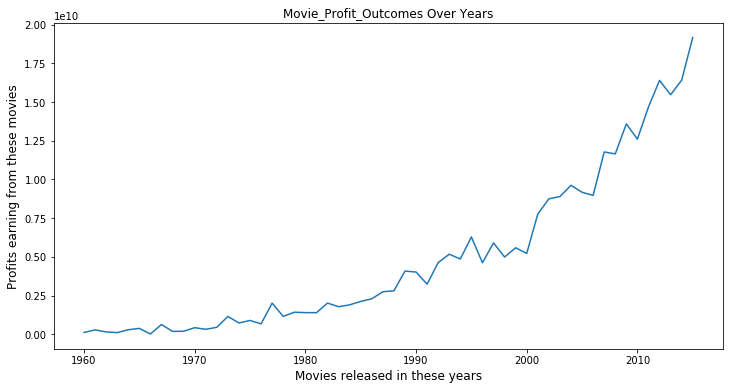

In [23]:
#plotting a figure(outline) and its size
plt.figure(figsize=(12,6))

#Labelling the title
plt.title('Movie_Profit_Outcomes Over Years')

#labelling the x_axis
plt.xlabel('Movies released in these years', fontsize = 12)

#Labelling the y_axis
plt.ylabel('Profits earning from these movies', fontsize = 12)

#plotting the  graph using profits_over_year(group_by_years) values 
plt.plot(profits_over_year)

In [24]:
#defining function to split the genre valus
def data(gen):
    gener = movie[gen].str.cat(sep='|')
    gener= pd.Series(gener.split('|'))
    no = gener.value_counts(ascending = False)
    return no

In [25]:
#calling the above function to count
#and assign the splitted genres values
No_of_count=data('genres')
No_of_count.head()

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
dtype: int64

# Plotting a horizontal bar_graph 

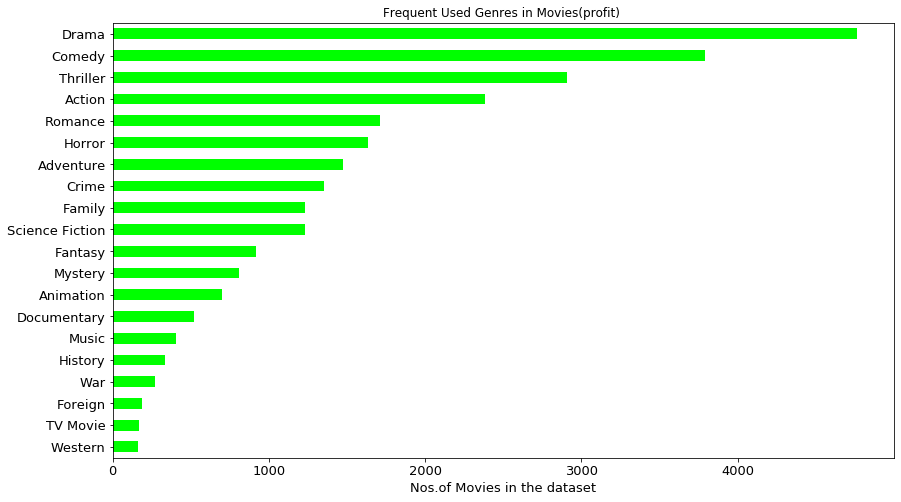

In [26]:
#plotting the most frequent appeared genres

#sorting the counted genres
No_of_count.sort_values(ascending = True, inplace = True)

#drawing the graph horizontally based on No_of_count values
dig = No_of_count.plot.barh(color = '#00FF00', fontsize = 13)

#labelling the title for the graph
dig.set(title = 'Frequent Used Genres in Movies(profit) ')

#labelling the x-axis
dig.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size
dig.figure.set_size_inches(14, 8)
plt.show()

In [27]:
#Defining the functions to calculate the average of columns
def avg_data(column):
    return imdb_movies[column].mean()

In [28]:
#calling function
#calculating average budget for movies
avg_data('budget')

14624286.06433502

In [29]:
#calling function
#calculating the average revenue generater from movies
avg_data('revenue')

39826896.07685228

In [30]:
#calling function
#calculating the average movies_runtime
avg_data('runtime')

102.07179015186378

In [31]:
#calling data function
#counting the appearance of casting members in movies
countin=data('cast')
countin.head()

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

# CONCLUSION:

In [32]:
print(f"The average budget of the movies is : {avg_data('budget')}")

The average budget of the movies is : 14624286.06433502


In [33]:
print(f"The average running time of the movies is : {avg_data('runtime')}")

The average running time of the movies is : 102.07179015186378


In [34]:
print(f"The average revenue generated from the movies : {avg_data('revenue')}")

The average revenue generated from the movies : 39826896.07685228


The above data analysis shows that the average revenue generated from the movies are much greater than the budget used for the 
movies.It can also be seen from the visualization that the revenue gradually increases over the years.Robert De Niro and 
Samuel L. Jackson are the casting members who has appeared most number of time.The average movie running time of most number
of movies were higher.The Drama genre hold the most number of movies watched and followed by comedy.It can be also observed that
the number of movie released is increasing over the time.